In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)

In [2]:
sensor_data = np.load('data/sensor_data.npy') # car sensors
input_keys = pd.read_json('data/input_keys.json') # physical input
car_data = np.load('data/car_data.npy') # Steering(l=-1, f=0, r=1), velocity, velocity_x, velocity_y

In [3]:
print(len(sensor_data), len(input_keys), len(car_data))

22753 22752 22752


In [4]:
car_data = pd.DataFrame(car_data, columns=['steer', 'velocity', 'velocity_x', 'velocity_y'])

In [5]:
# normalize to 0-1
# car_data['steer'] = abs((car_data['steer'] - 1)/(1 -(-1)))
# car_data['velocity'] = (car_data['velocity'] - 0)/(40 -(-0))
# car_data['velocity_x'] = abs((car_data['velocity_x'] - (-40))/(40 -(-40)))
# car_data['velocity_y'] = abs((car_data['velocity_y'] - (-40))/(40 -(-40)))

In [6]:
input_keys = pd.DataFrame(input_keys)

In [7]:
# input_keys = input_keys.drop(columns=112) # remove record button
input_keys = input_keys.fillna(0)
input_keys = input_keys.rename(columns={119:'W',97:'A',100:'D'})

In [8]:
sens_data = sensor_data.reshape((len(sensor_data),6))

In [9]:
sensors = pd.DataFrame(sens_data)

In [10]:
sensors

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
22748,0,0,0,0,0,0
22749,0,0,0,0,0,0
22750,0,0,0,0,0,0
22751,0,0,0,0,0,0


In [8]:
# color_map:
# road: (0, 0, 0)
# line: (254, 254, 254)
# grass: (0, 188, 0)

# steer:-1(L)  0(F)  1(R)

In [17]:
sensors = sensors[:-1]

22752

In [20]:
X = pd.concat([sensors, car_data], axis=1)

In [26]:
X.iloc[1000]

0               0.000000
1               0.000000
2               0.000000
3             254.000000
4             255.000000
5             254.000000
steer          -1.000000
velocity       40.000000
velocity_x    -34.589998
velocity_y    -20.088106
Name: 1000, dtype: float64

In [27]:
y = input_keys

In [28]:
y.head()

,W,A,D
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [31]:
X_train = X[:20000]
X_val = X[20000:22752]
y_train = y[:20000]
y_val = y[20000:22752]

In [32]:
print(X_train.shape, y_train.shape)

(20000, 10) (20000, 3)


In [34]:
X_train.shape

(20000, 10)

In [51]:
# input features:
# X: road-road(1), road-line(2), road-grass(3), line-road(4), grass-road, steer, velocity(0-40), velocity_x, velocity_y
# Y: left-steer, gas-forward, right-steer

# output:
# gas-forward(119), left-steer(97), right-steer(100)

## analyse data

In [41]:
del model

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam 

# define model
in_shape = (10,) # number of features
model = Sequential()
model.add(Dense(12, input_shape=in_shape, activation="relu"))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics=['acc']
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 27        
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________


In [43]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.20)

Train on 16000 samples, validate on 4000 samples
Epoch 1/50
16000/16000 [==============================] - 1s 44us/step - loss: 10.5819 - acc: 0.7450 - val_loss: 4.4810 - val_acc: 0.7700
Epoch 2/50
16000/16000 [==============================] - 1s 38us/step - loss: 7.2279 - acc: 0.8351 - val_loss: 23.3745 - val_acc: 1.0000
Epoch 3/50
16000/16000 [==============================] - 1s 36us/step - loss: 20.8752 - acc: 0.8630 - val_loss: 16.3071 - val_acc: 0.0540
Epoch 4/50
16000/16000 [==============================] - 1s 36us/step - loss: 33.3453 - acc: 0.8690 - val_loss: 63.0336 - val_acc: 0.2440
Epoch 5/50
16000/16000 [==============================] - 1s 37us/step - loss: 56.9505 - acc: 0.8792 - val_loss: 28.0631 - val_acc: 1.0000
Epoch 6/50
16000/16000 [==============================] - 1s 37us/step - loss: 98.1407 - acc: 0.8870 - val_loss: 81.1910 - val_acc: 1.0000
Epoch 7/50
16000/16000 [==============================] - 1s 37us/step - loss: 116.7509 - acc: 0.8784 - val_loss: 67.78

In [44]:
model.save('models/temp1.hdf5')

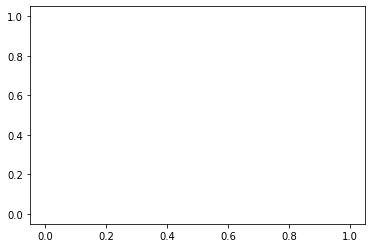

In [75]:
plt.plot(hist.history['loss'])

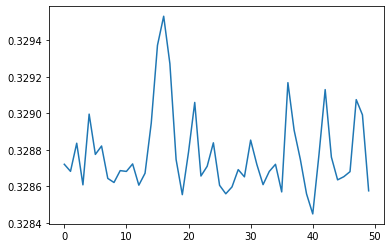

In [583]:
plt.plot(hist.history['loss'])

In [229]:
X[1360:1370]

,RR,RL,RG,LR,GR,steer,velocity,velocity_x,velocity_y
1360,0,1,0,0,0,0.0,40.0,16.733038,-36.331879
1361,0,1,0,0,0,0.0,40.0,16.733038,-36.331879
1362,0,1,0,0,0,0.0,40.0,16.733038,-36.331879
1363,0,1,0,0,0,0.0,40.0,16.733038,-36.331879
1364,0,1,0,0,0,0.0,40.0,16.733038,-36.331879
1365,0,1,0,0,0,0.0,40.0,16.733038,-36.331879
1366,0,1,0,0,0,0.0,40.0,16.733038,-36.331879
1367,0,1,0,0,0,0.0,40.0,16.733038,-36.331879
1368,0,1,0,0,0,0.0,40.0,16.733038,-36.331879
1369,0,1,0,0,0,0.0,40.0,16.733038,-36.331879


In [510]:
preds=model.predict(X_val)
preds_ = np.round(preds)
comparison = np.equal(y_val.values, preds_)
com_cnt = np.all(comparison, axis=1)
un, cnts = np.unique(com_cnt, return_counts=True)

In [511]:
cnts

array([2750])

train: <b>array([ 3339, 19413])</b>  
val: <b>array([ 248, 2502])<b>
    
mod 3:
train: <b> array([  123, 22629])</b>  
val: <b>array([2750])<b>


## test record

In [630]:
test_recs = np.load('./data/test_record.npy')
tst_recs = np.round(test_recs,2)

In [631]:
preds_test = model.predict(test_recs)

In [632]:
np.round(preds_test, 2)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [523]:
#full
full = np.hstack((tst_recs, np.round(preds_test, 2)))

In [525]:
full = pd.DataFrame(full)

In [540]:
full.head(40)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,-0.0,0.28,0.0,0.04
1,1.0,0.0,0.0,0.0,0.0,0.0,1.73,1.73,-0.0,0.96,0.0,0.00
2,1.0,0.0,0.0,0.0,0.0,0.0,4.80,4.80,-0.0,1.00,0.0,0.00
3,1.0,0.0,0.0,0.0,0.0,0.0,5.76,5.76,-0.0,1.00,0.0,0.00
4,1.0,0.0,0.0,0.0,0.0,0.0,6.12,6.12,-0.0,1.00,0.0,0.00
5,1.0,0.0,0.0,0.0,0.0,0.0,6.46,6.46,-0.0,1.00,0.0,0.00
6,1.0,0.0,0.0,0.0,0.0,0.0,6.81,6.81,-0.0,1.00,0.0,0.00
7,1.0,0.0,0.0,0.0,0.0,0.0,7.17,7.17,-0.0,1.00,0.0,0.00
8,1.0,0.0,0.0,0.0,0.0,0.0,7.52,7.52,-0.0,1.00,0.0,0.00
9,1.0,0.0,0.0,0.0,0.0,0.0,7.88,7.88,-0.0,1.00,0.0,0.00


In [616]:
tr = full.loc[full[1] == 1] 
tr[9] = 0
tr[10] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [617]:
t = pd.concat([tr]*100, ignore_index=True)

In [618]:
tx = t.iloc[:,0:9]

In [621]:
ty = t.iloc[:,9:]

In [622]:
new_x = np.vstack((X_train.values, tx.values))

In [623]:
new_y = np.vstack((y_train.values, ty.values))

In [625]:
new_x.shape

(21700, 9)

In [249]:
with np.printoptions(precision=3, suppress=True):
    print(preds[:2600])

[[0.997 0.    0.   ]
 [0.997 0.    0.   ]
 [0.997 0.    0.   ]
 ...
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]]


In [640]:
# RR   RL   RG   LR   GR   velocity    Steer    Vel_x .   Vel_y
test = model_2.predict(np.array([[0,0,0,1,0,0,40,16.733038,0]]))
# test2 = model.predict(np.array([[0,0,0,0,1,0.8]]))
# test3 = model.predict(np.array([[0,0,1,0,0,0.7]]))
# test4 = model.predict(np.array([[0,1,0,0,0,1]]))
# test5 = model.predict(np.array([[0,0,0,1,0,1]]))

In [641]:
with np.printoptions(precision=4, suppress=True):
    print(test)

[[1. 0. 0.]]


In [332]:
# W   A   D
with np.printoptions(precision=3, suppress=True):
    print(test)
    print(test2)
    print(test3)
    print(test4)
    print(test5)

[[0.784 0.102 0.034]]
[[0.739 0.039 0.037]]
[[0.958 0.244 0.001]]
[[0.916 0.245 0.003]]
[[0.784 0.016 0.021]]


In [256]:
t = np.array(X.values[0])

In [638]:
model_2 = keras.models.load_model('./models/car_ai_2.hdf5')

In [639]:
model_2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 12)                120       
_________________________________________________________________
dense_80 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_81 (Dense)             (None, 3)                 27        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [306]:
test = model_2.predict(np.array([[0,0,0,0,0,0,40,16.733038,-36.331879]]))


In [307]:
test

array([[1., 0., 0.]], dtype=float32)

In [308]:
test.shape

(1, 3)

In [309]:
np.equal(test,[1,0,0])

array([[ True,  True,  True]])

In [318]:
if (test == [0,2,0]).any():
    print('f')

f
